# Error Analysis

In [291]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import matplotlib

## FedAdam Training

In [292]:
etas = ['0.01','0.1','1','10', '100']
eta_ls = ['0.01','0.1','0.3162', '1','10']
taus = ['1e-09','1e-06','0.001']
path_to_fedAdamHyperparameterSweep = Path('FedAdam_SyntheticTraining')

In [293]:
fedAdamHyperParameterSweepHists = {}
for tau in taus:
    fedAdamHyperParameterSweepHists[tau] = {}
    for eta_l in eta_ls:
        fedAdamHyperParameterSweepHists[tau][eta_l] = {}
        for eta in etas:
            fedAdamHyperParameterSweepHists[tau][eta_l][eta] = np.load(path_to_fedAdamHyperparameterSweep / Path(f'hist_num_clients=20_num_rounds=100_num_local_epochs=20_eta={eta}_eta_l={eta_l}_tau={tau}.npy'), allow_pickle=True).item().losses_centralized

To pick the best hyperparameters will choose set with best average MSE across the last ten rounds

In [294]:
fedAdamHyperParameterSweepMSEs = {}
for tau in taus:
    fedAdamHyperParameterSweepMSEs[tau] = {}
    for eta_l in eta_ls:
        fedAdamHyperParameterSweepMSEs[tau][eta_l] = {}
        for eta in etas:
            fedAdamHyperParameterSweepMSEs[tau][eta_l][eta] = np.mean([loss for (_, loss) in fedAdamHyperParameterSweepHists[tau][eta_l][eta][-10:]])

In [295]:
fedAdamHyperParameterSweepMSEArrays = {}
for tau in taus:
    fedAdamHyperParameterSweepMSEArrays[tau] = [[fedAdamHyperParameterSweepMSEs[tau][eta_l][eta] for eta in etas] for eta_l in eta_ls]

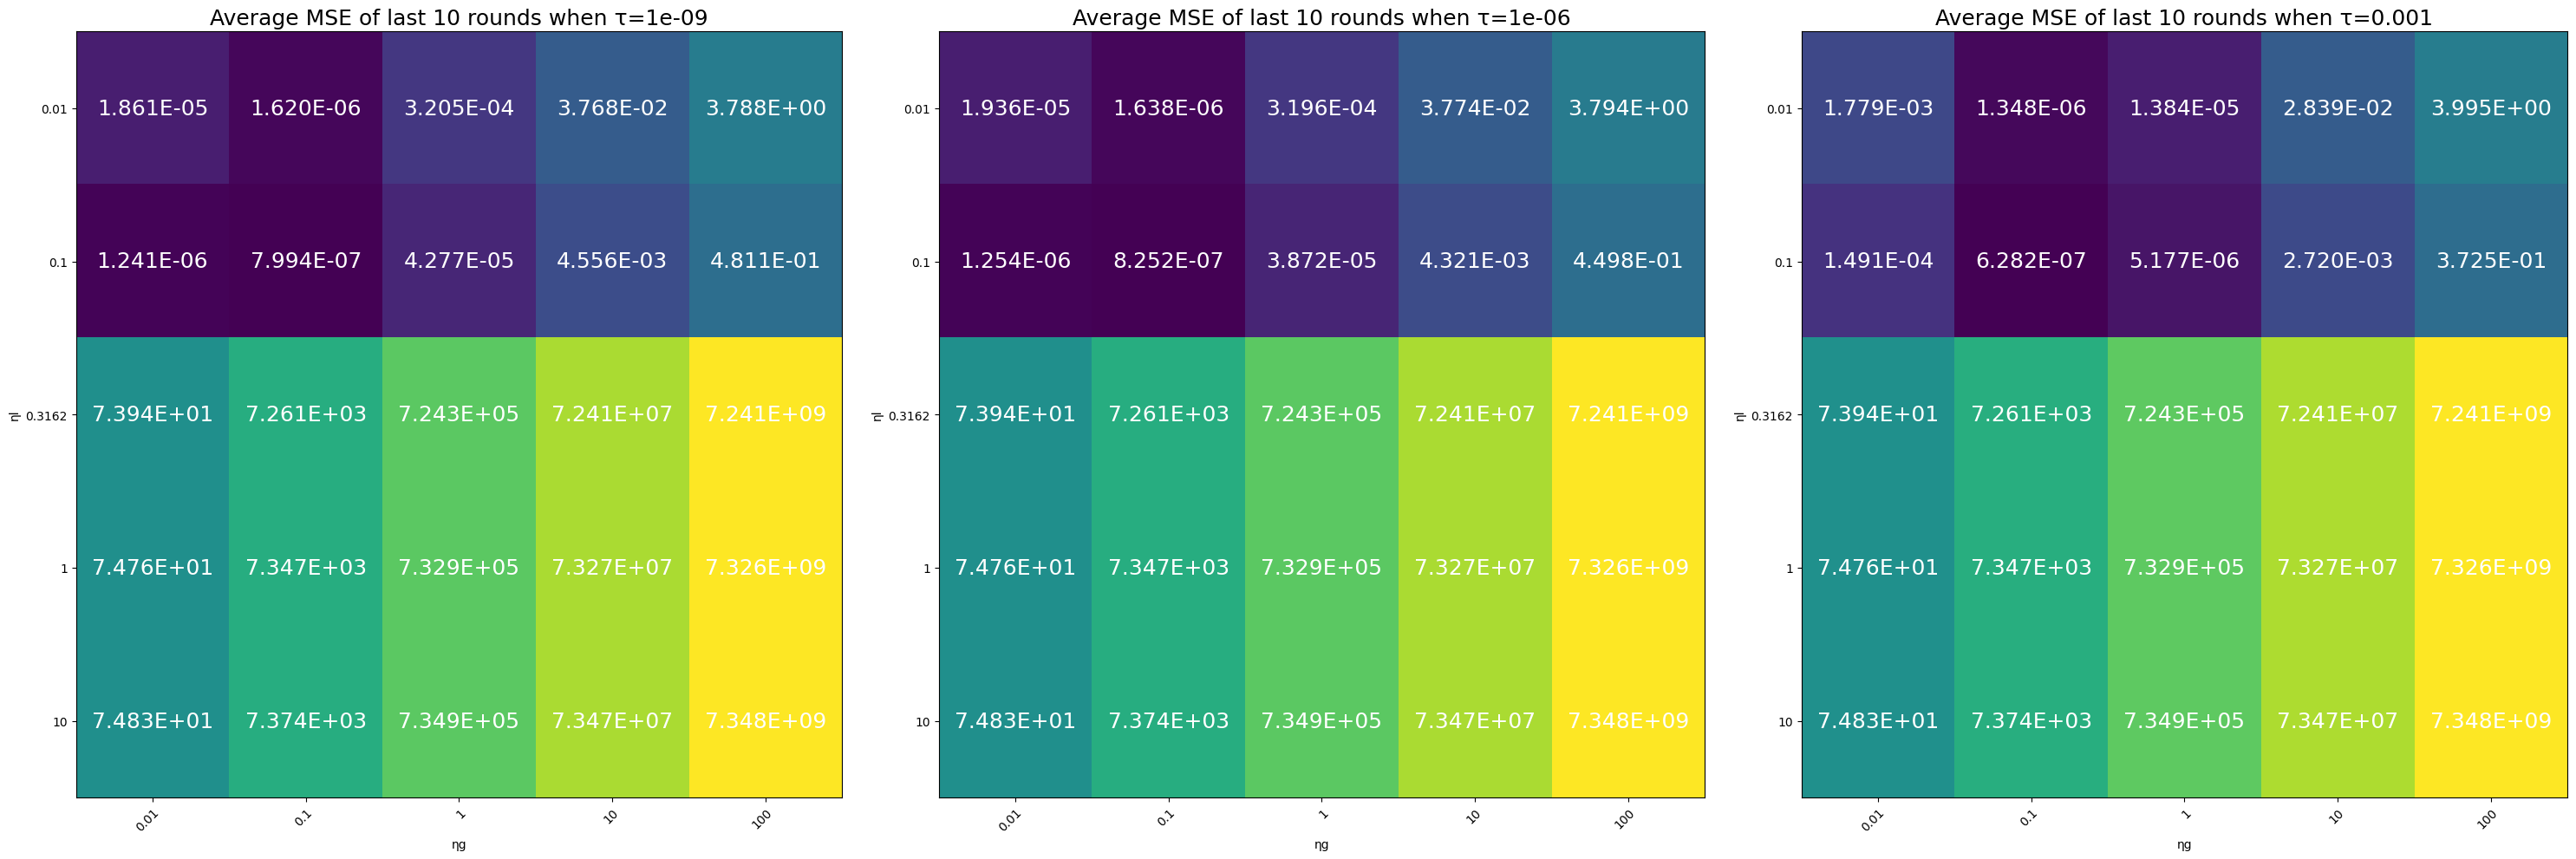

In [296]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(30,10))
for k, tau in enumerate(taus):
    im = ax[k].imshow(fedAdamHyperParameterSweepMSEArrays[tau], norm=matplotlib.colors.LogNorm())

    # Show all ticks and label them with the respective list entries
    ax[k].set_xticks(np.arange(len(etas)), labels=etas)
    ax[k].set_yticks(np.arange(len(eta_ls)), labels=eta_ls)

    # Show the x and y labels
    ax[k].set_xlabel("ηg")
    ax[k].set_ylabel("ηl")

    # Rotate the tick labels and set their alignment.
    plt.setp(ax[k].get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(etas)):
        for j in range(len(eta_ls)):
            text = ax[k].text(j, i, f"{fedAdamHyperParameterSweepMSEArrays[tau][i][j]:.3E}",
                        ha="center", va="center", color="w", fontdict={'size' : 18})

    ax[k].set_title(f"Average MSE of last 10 rounds when τ={tau}", fontdict={'size' : 18})
    fig.tight_layout()
plt.show()

fig.savefig("fedAdamSyntheticHyperpameterTuning.pdf")

## Plot 200 Rounds of Synthetic

In [297]:
synthetic_algorithms = ['FedAvg', 'FedExp', 'FedAdagrad', 'FedAdam', 'FedProx']
cmap = plt.get_cmap('Set2', len(synthetic_algorithms))
path_to_synthetic_seed_42 = Path("SyntheticSeed42")

In [298]:
synthetic_algorithm_losses = {}
for alg in synthetic_algorithms:
    if (path_to_synthetic_seed_42 / Path(alg)).exists():
        synthetic_algorithm_losses[alg] = [loss for (_, loss) in np.load(path_to_synthetic_seed_42 / Path(alg) / Path(f'hist_num_clients=20_num_rounds=200_num_local_epochs=20.npy'), allow_pickle=True).item().losses_centralized]

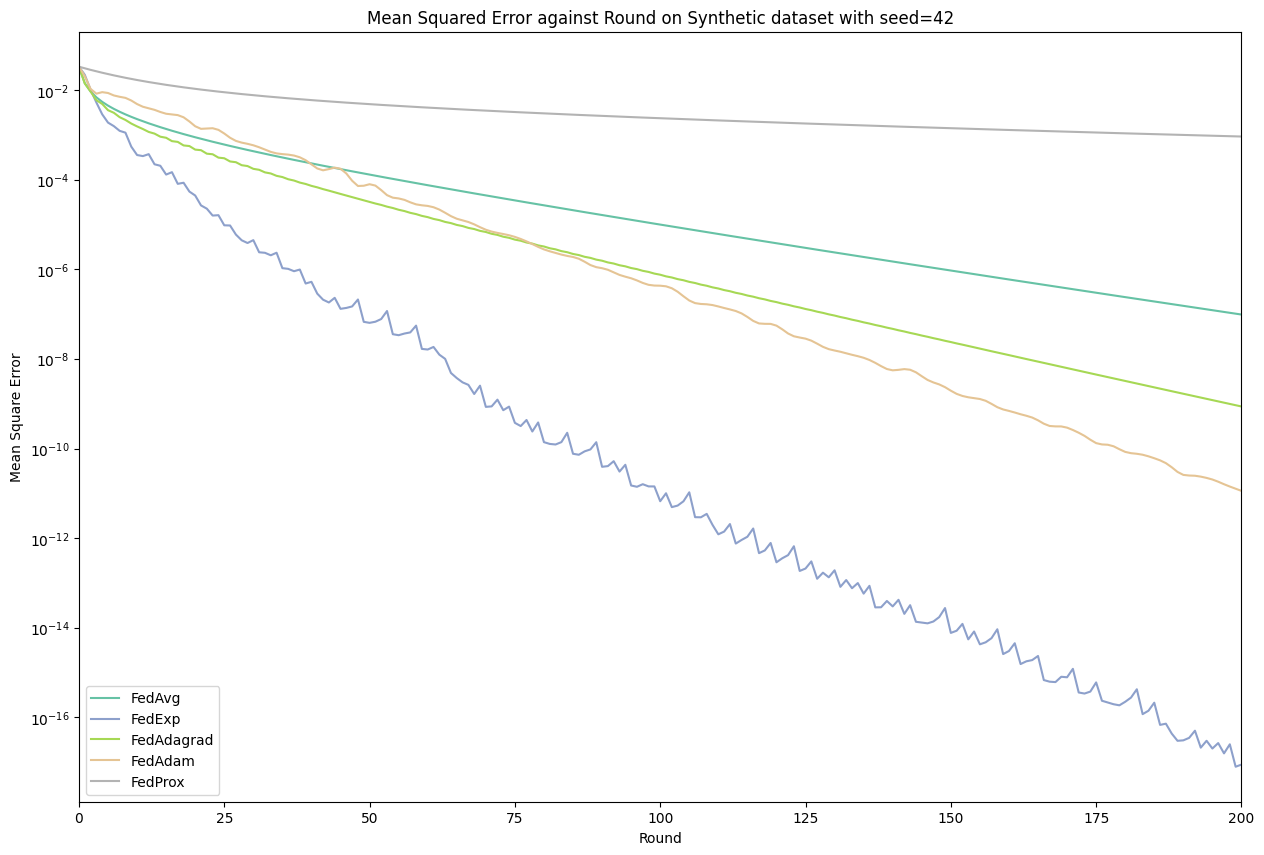

In [299]:
fig, ax = plt.subplots(figsize=(15,10))
for i, alg in enumerate(synthetic_algorithm_losses):
    ax.plot(np.arange(len(synthetic_algorithm_losses[alg])), synthetic_algorithm_losses[alg], c = cmap(i), label = alg)

ax.set_yscale("log")
ax.set_xbound(0, len(synthetic_algorithm_losses[alg]) - 1)
ax.set_ylabel("Mean Square Error")
ax.set_xlabel("Round")
ax.legend()

ax.set_title("Mean Squared Error against Round on Synthetic dataset with seed=42")
plt.show()
fig.tight_layout()
fig.savefig("syntheticSeed42_200Rounds.pdf")

In [300]:
path_to_synthetic_seed_0 = Path("SyntheticSeed0")
synthetic_algorithm_losses = {}
for alg in synthetic_algorithms:
    if (path_to_synthetic_seed_0 / Path(alg)).exists():
        synthetic_algorithm_losses[alg] = [loss for (_, loss) in np.load(path_to_synthetic_seed_0 / Path(alg) / Path(f'hist_num_clients=20_num_rounds=200_num_local_epochs=20.npy'), allow_pickle=True).item().losses_centralized]

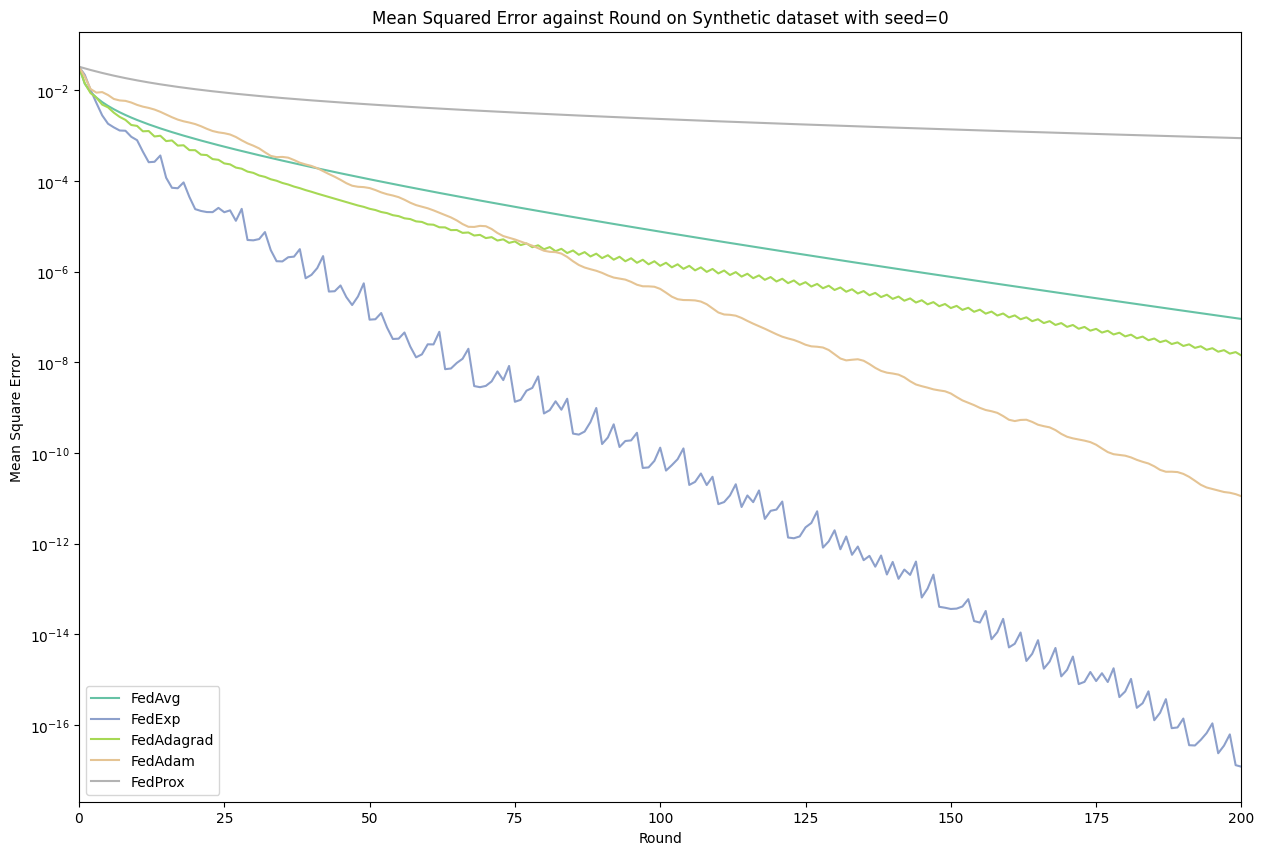

In [301]:
fig, ax = plt.subplots(figsize=(15,10))
for i, alg in enumerate(synthetic_algorithm_losses):
    ax.plot(np.arange(len(synthetic_algorithm_losses[alg])), synthetic_algorithm_losses[alg], c = cmap(i), label = alg)

ax.set_yscale("log")
ax.set_xbound(0, len(synthetic_algorithm_losses[alg]) - 1)
ax.set_ylabel("Mean Square Error")
ax.set_xlabel("Round")
ax.legend()

ax.set_title("Mean Squared Error against Round on Synthetic dataset with seed=0")
plt.show()
fig.tight_layout()
fig.savefig("syntheticSeed0_200Rounds.pdf")

# Plot Synthetic 2000 Rounds

In [302]:
path_to_synthetic_seed_2000_rounds = Path("Synthetic_2000Rounds")
synthetic_algorithm_losses = {}
for alg in synthetic_algorithms:
    if (path_to_synthetic_seed_2000_rounds / Path(alg)).exists():
        synthetic_algorithm_losses[alg] = [loss for (_, loss) in np.load(path_to_synthetic_seed_2000_rounds / Path(alg) / Path(f'hist_num_clients=20_num_rounds=2000_num_local_epochs=20.npy'), allow_pickle=True).item().losses_centralized]

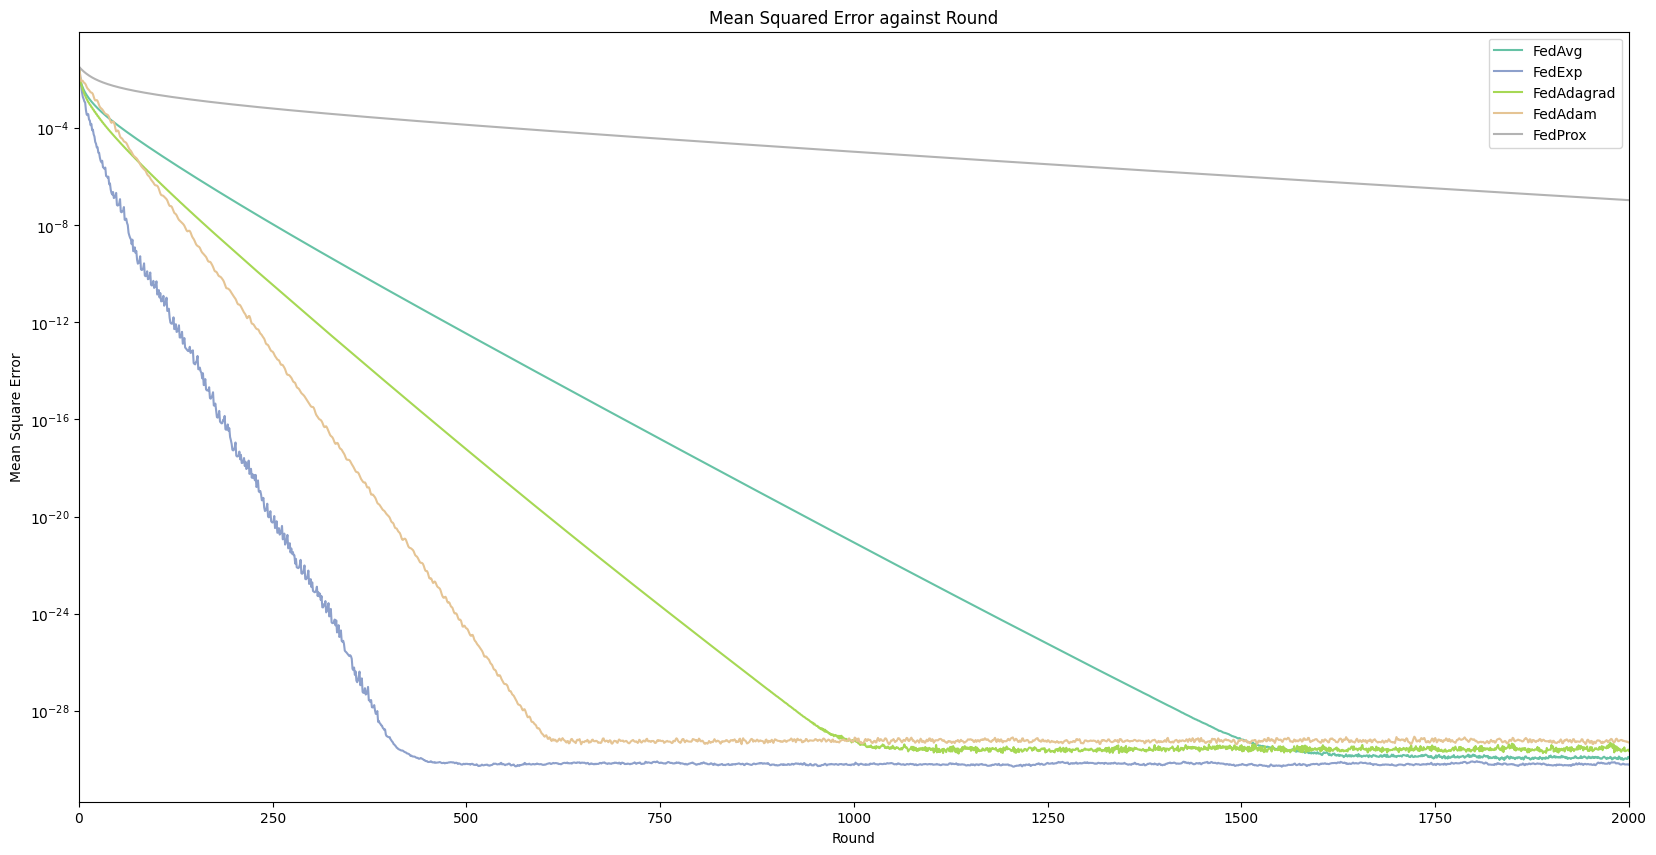

In [303]:
fig, ax = plt.subplots(figsize=(20,10))
for i, alg in enumerate(synthetic_algorithm_losses):
    ax.plot(np.arange(len(synthetic_algorithm_losses[alg])), synthetic_algorithm_losses[alg], c = cmap(i), label = alg)

ax.set_yscale("log")
ax.set_xbound(0, len(synthetic_algorithm_losses[alg]) - 1)
ax.set_ylabel("Mean Square Error")
ax.set_xlabel("Round")
ax.legend()

ax.set_title("Mean Squared Error against Round")
plt.show()
fig.tight_layout()
fig.savefig("synthetic_2000Rounds.pdf")

## Synthetic Effects of Averaging Weights FedExP

In [304]:
averagingRounds = [1,2,5,20,50]
cmap = plt.get_cmap('Set2', len(averagingRounds))
path_to_synthetic_varying_rounds = Path("Synthetic_VaryingAveragingRounds")

In [305]:
synthetic_algorithm_losses = {}
for avgRounds in averagingRounds:
    synthetic_algorithm_losses[avgRounds] = [loss for (_, loss) in np.load(path_to_synthetic_varying_rounds / Path(f'hist_num_clients=20_num_rounds=200_num_local_epochs=20_{avgRounds}.npy'), allow_pickle=True).item().losses_centralized]

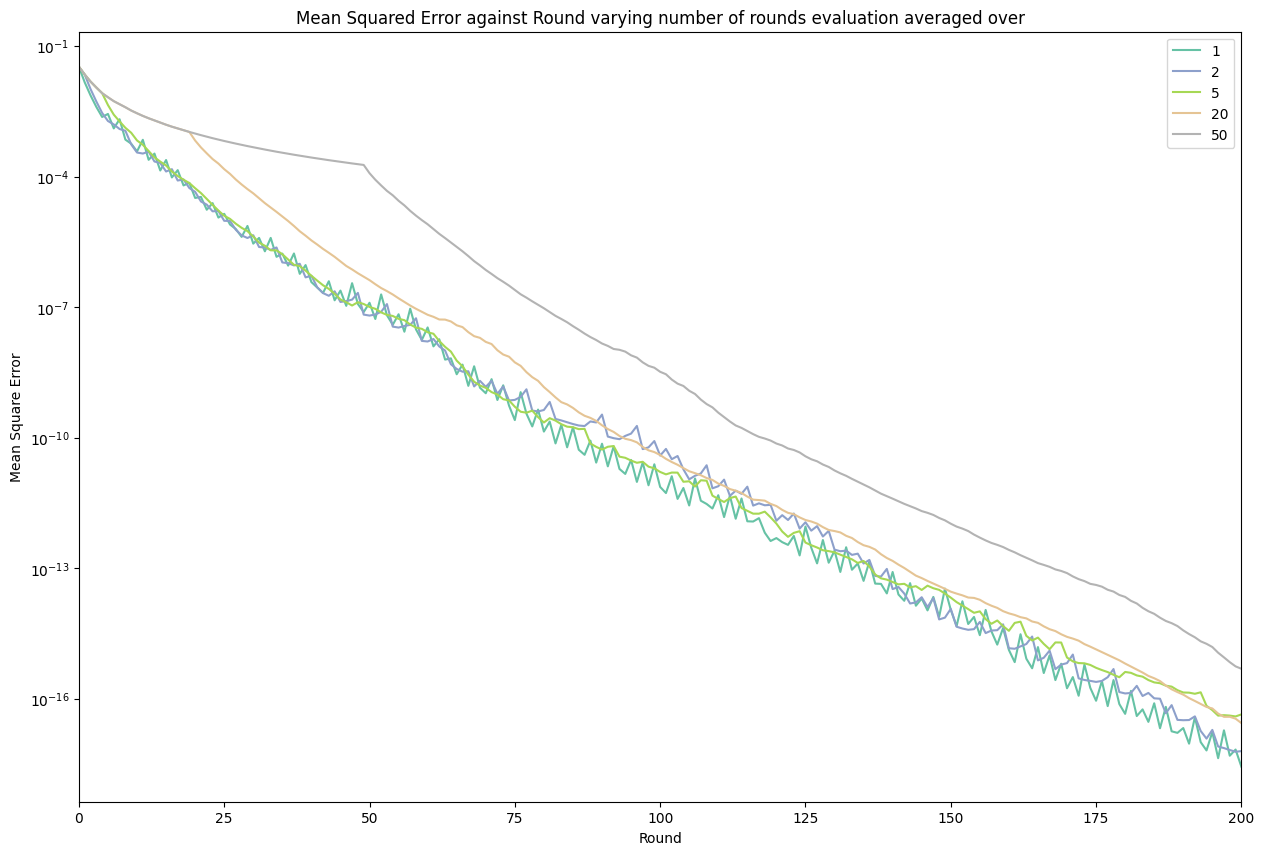

In [306]:
fig, ax = plt.subplots(figsize=(15,10))
for i, numRounds in enumerate(synthetic_algorithm_losses):
    ax.plot(np.arange(len(synthetic_algorithm_losses[numRounds])), synthetic_algorithm_losses[numRounds], c = cmap(i), label = numRounds)

ax.set_yscale("log")
ax.set_xbound(0, len(synthetic_algorithm_losses[numRounds]) - 1)
ax.set_ylabel("Mean Square Error")
ax.set_xlabel("Round")
ax.legend()

ax.set_title("Mean Squared Error against Round varying number of rounds evaluation averaged over")
plt.show()
fig.tight_layout()
fig.savefig("synthetic_numberOfRoundsAverageEvaluate.pdf")

## Changing the value for epsilon on synthetic dataset

In [307]:
epsilon_values = ['0', '1e-10','1e-06', '0.001', '1', '10', '100', '1000000']
cmap = plt.get_cmap('Set2', len(epsilon_values))
path_to_synthetic_seed_varying_epsilon = Path("FedExpSynthetic_VaryingEpsilon")
synthetic_algorithm_losses = {}
for epsilon in epsilon_values:
    synthetic_algorithm_losses[epsilon] = [loss for (_, loss) in np.load(path_to_synthetic_seed_varying_epsilon / Path(f'hist_num_clients=20_num_rounds=2000_num_local_epochs=20_epsilon={epsilon}.npy'), allow_pickle=True).item().losses_centralized]

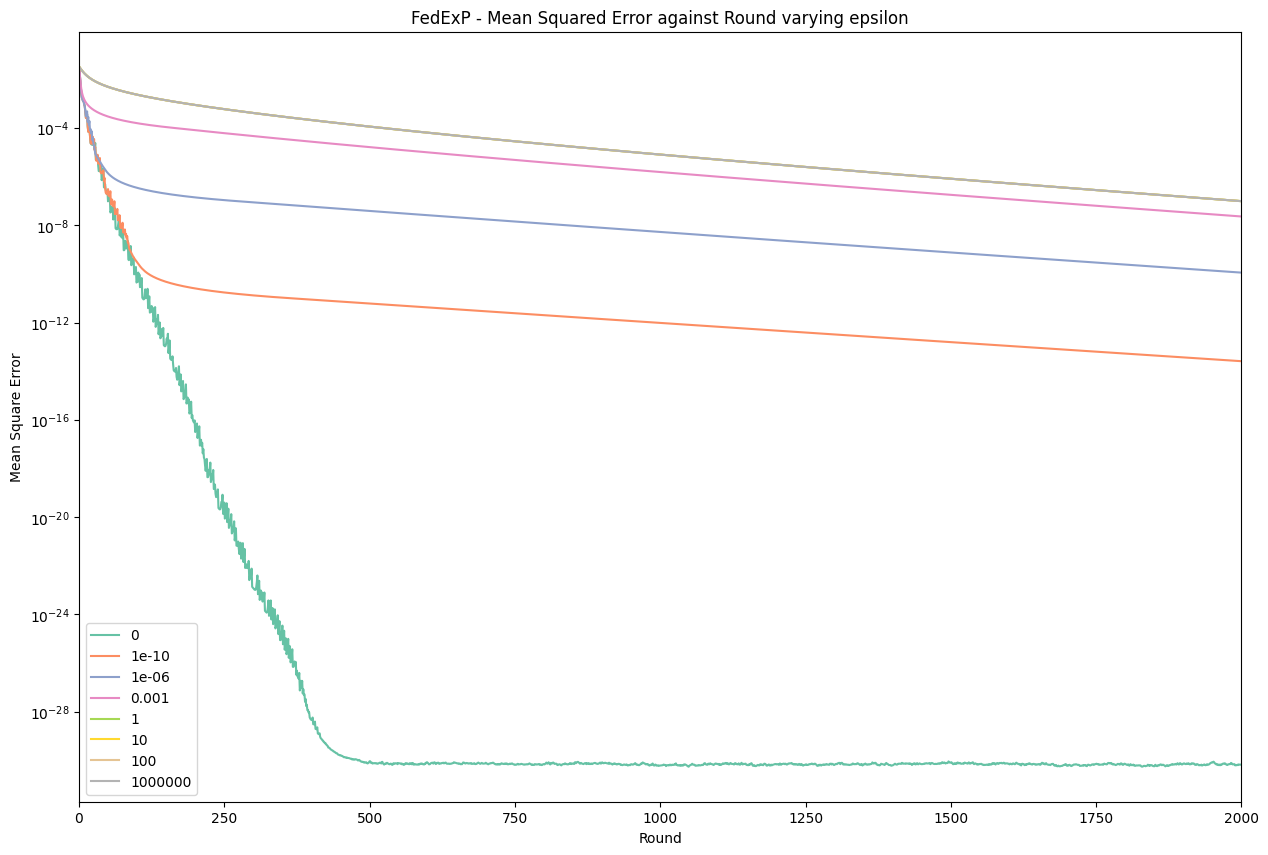

In [308]:
fig, ax = plt.subplots(figsize=(15,10))
for i, epsilon in enumerate(synthetic_algorithm_losses):
    ax.plot(np.arange(len(synthetic_algorithm_losses[epsilon])), synthetic_algorithm_losses[epsilon], c = cmap(i), label = epsilon)

ax.set_yscale("log")
ax.set_xbound(0, len(synthetic_algorithm_losses[epsilon]) - 1)
ax.set_ylabel("Mean Square Error")
ax.set_xlabel("Round")
ax.legend()

ax.set_title("FedExP - Mean Squared Error against Round varying epsilon")
plt.show()
fig.tight_layout()
fig.savefig("synthetic_varyingEpsilon.pdf")

## Femnist

In [309]:
femnist_algorithms = ['FedAvg', 'FedExp', 'FedAdagrad', 'FedProx']
cmap = plt.get_cmap('Set2', len(femnist_algorithms))
path_to_femnist = Path("FEMNIST")
femnist_algorithm_accuracies = {}
for alg in femnist_algorithms:
    femnist_algorithm_accuracies[alg] = [acc for (_, acc) in np.load(path_to_femnist / Path(alg) / Path('hist_num_clients=3230_num_rounds=5_num_local_epochs=20.npy'), allow_pickle=True).item().metrics_centralized['accuracy']]

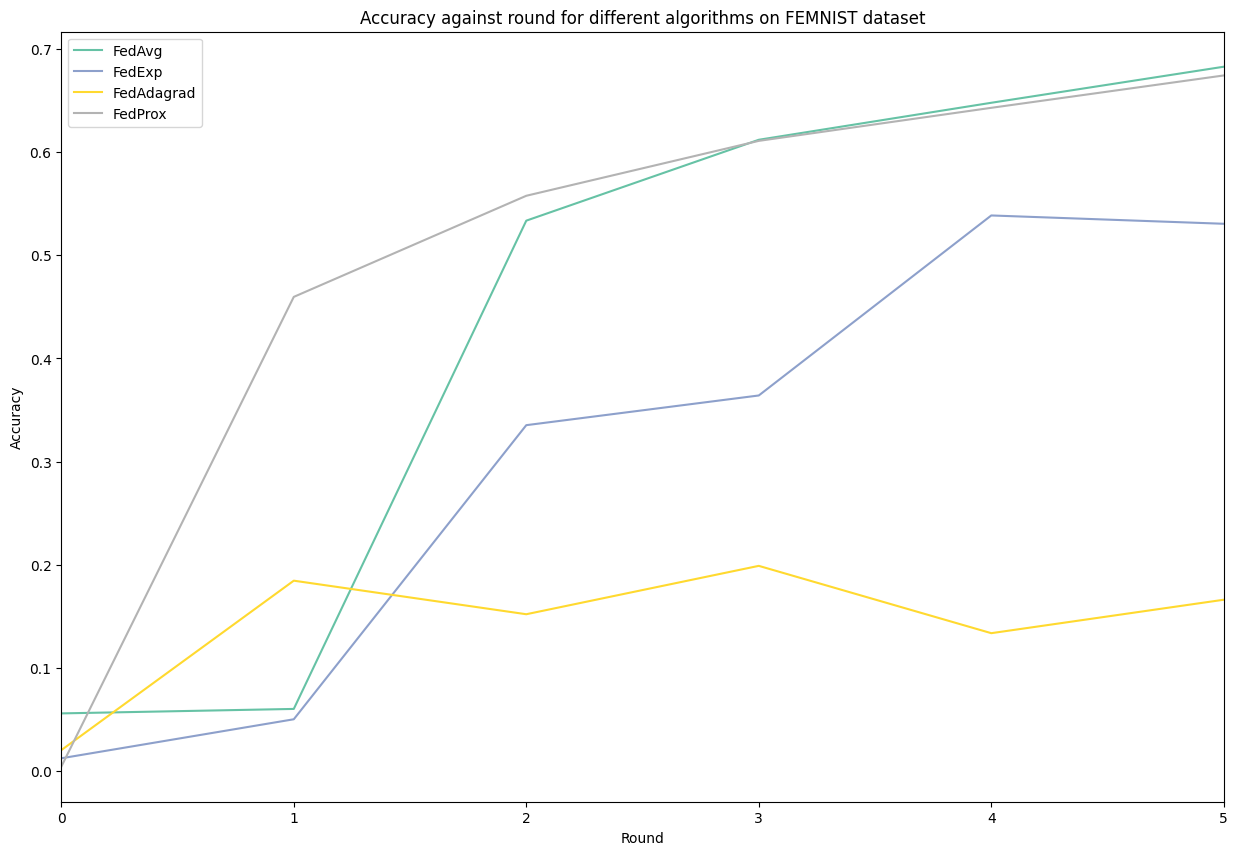

In [310]:
fig, ax = plt.subplots(figsize=(15,10))
for i, alg in enumerate(femnist_algorithm_accuracies):
    ax.plot(np.arange(len(femnist_algorithm_accuracies[alg])), femnist_algorithm_accuracies[alg], c = cmap(i), label = alg)

ax.set_xbound(0, len(femnist_algorithm_accuracies[alg]) - 1)
ax.set_ylabel("Accuracy")
ax.set_xlabel("Round")
ax.legend()

ax.set_title("Accuracy against round for different algorithms on FEMNIST dataset")
plt.show()
fig.tight_layout()
fig.savefig("femnist_allAlgs.pdf")

## CIFAR10

In [311]:
cifar10_algorithms = ['FedAvg', 'FedExp', 'FedAdagrad', 'FedProx']
cmap = plt.get_cmap('Set2', len(cifar10_algorithms))
path_to_cifar10 = Path("CIFAR10")
cifar10_algorithm_accuracies = {}
for alg in cifar10_algorithms:
    cifar10_algorithm_accuracies[alg] = [acc for (_, acc) in np.load(path_to_cifar10 / Path(alg) / Path('hist_num_clients=100_num_rounds=10_num_local_epochs=3.npy'), allow_pickle=True).item().metrics_centralized['accuracy']]

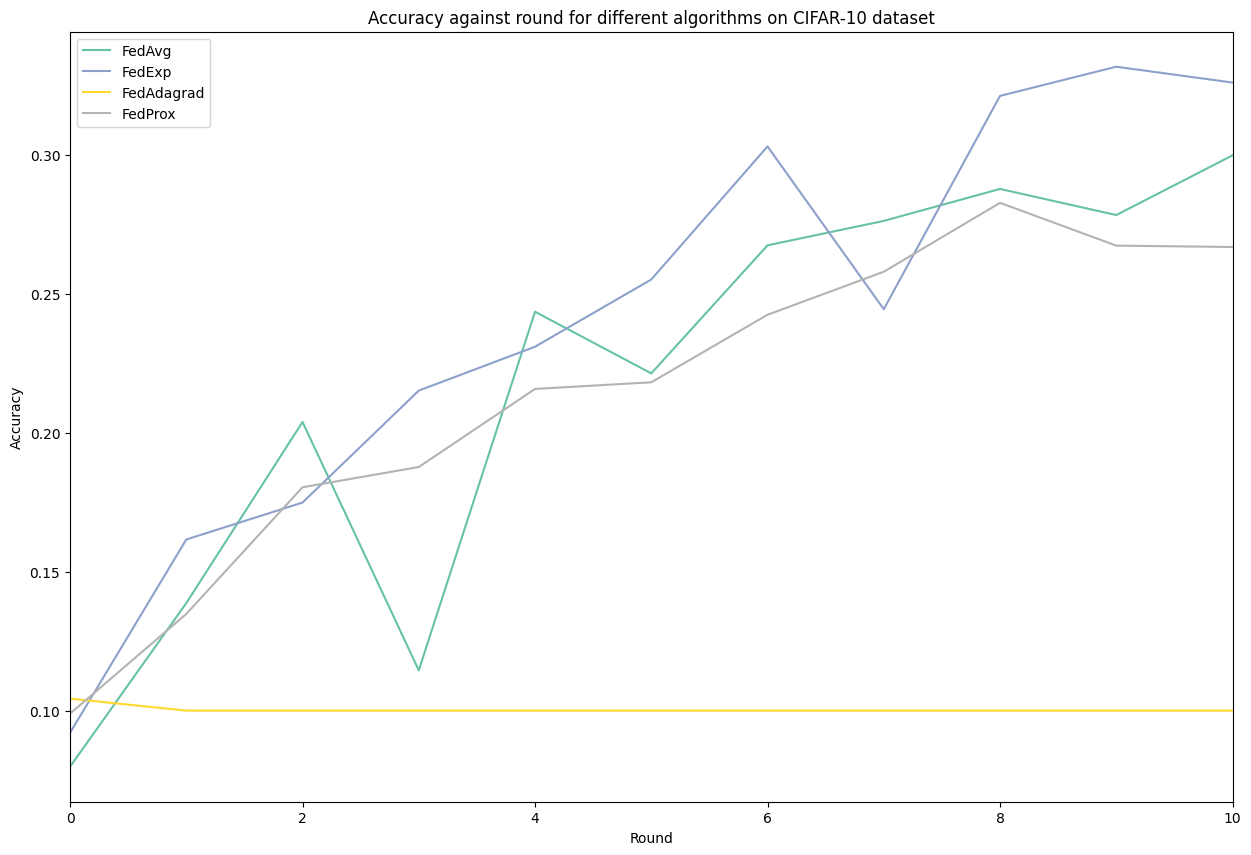

In [312]:
fig, ax = plt.subplots(figsize=(15,10))
for i, alg in enumerate(cifar10_algorithm_accuracies):
    ax.plot(np.arange(len(cifar10_algorithm_accuracies[alg])), cifar10_algorithm_accuracies[alg], c = cmap(i), label = alg)

ax.set_xbound(0, len(cifar10_algorithm_accuracies[alg]) - 1)
ax.set_ylabel("Accuracy")
ax.set_xlabel("Round")
ax.legend()

ax.set_title("Accuracy against round for different algorithms on CIFAR-10 dataset")
plt.show()
fig.tight_layout()
fig.savefig("cifar10_allAlgs.pdf")

## CIFAR100

In [313]:
cifar100_algorithms = ['FedAvg', 'FedExp', 'FedAdagrad', 'FedProx']
cmap = plt.get_cmap('Set2', len(cifar100_algorithms))
path_to_cifar100 = Path("CIFAR100")
cifar100_algorithm_accuracies = {}
for alg in cifar100_algorithms:
    cifar100_algorithm_accuracies[alg] = [acc for (_, acc) in np.load(path_to_cifar100 / Path(alg) / Path('hist_num_clients=100_num_rounds=5_num_local_epochs=3.npy'), allow_pickle=True).item().metrics_centralized['accuracy']]

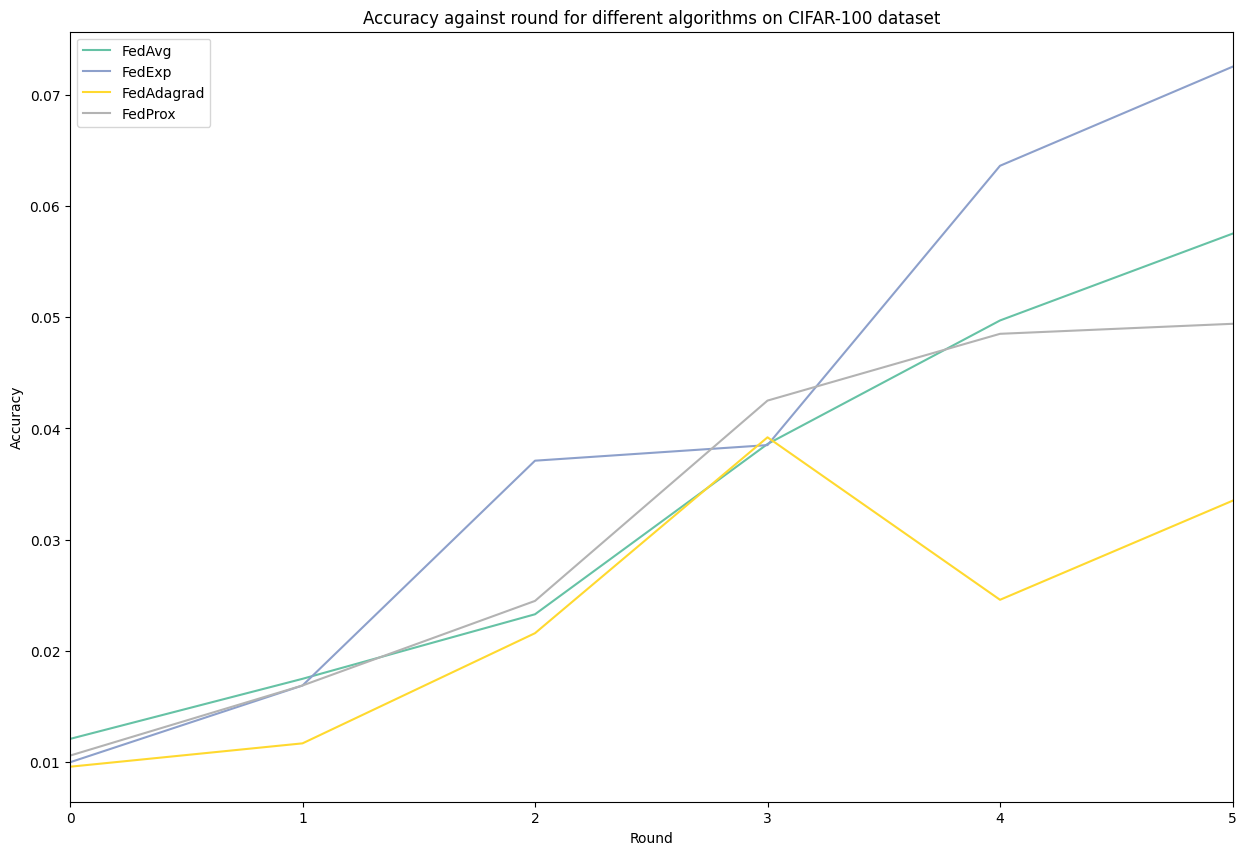

In [314]:
fig, ax = plt.subplots(figsize=(15,10))
for i, alg in enumerate(cifar100_algorithm_accuracies):
    ax.plot(np.arange(len(cifar100_algorithm_accuracies[alg])), cifar100_algorithm_accuracies[alg], c = cmap(i), label = alg)

ax.set_xbound(0, len(cifar100_algorithm_accuracies[alg]) - 1)
ax.set_ylabel("Accuracy")
ax.set_xlabel("Round")
ax.legend()

ax.set_title("Accuracy against round for different algorithms on CIFAR-100 dataset")
plt.show()
fig.tight_layout()
fig.savefig("cifar100_allAlgs.pdf")

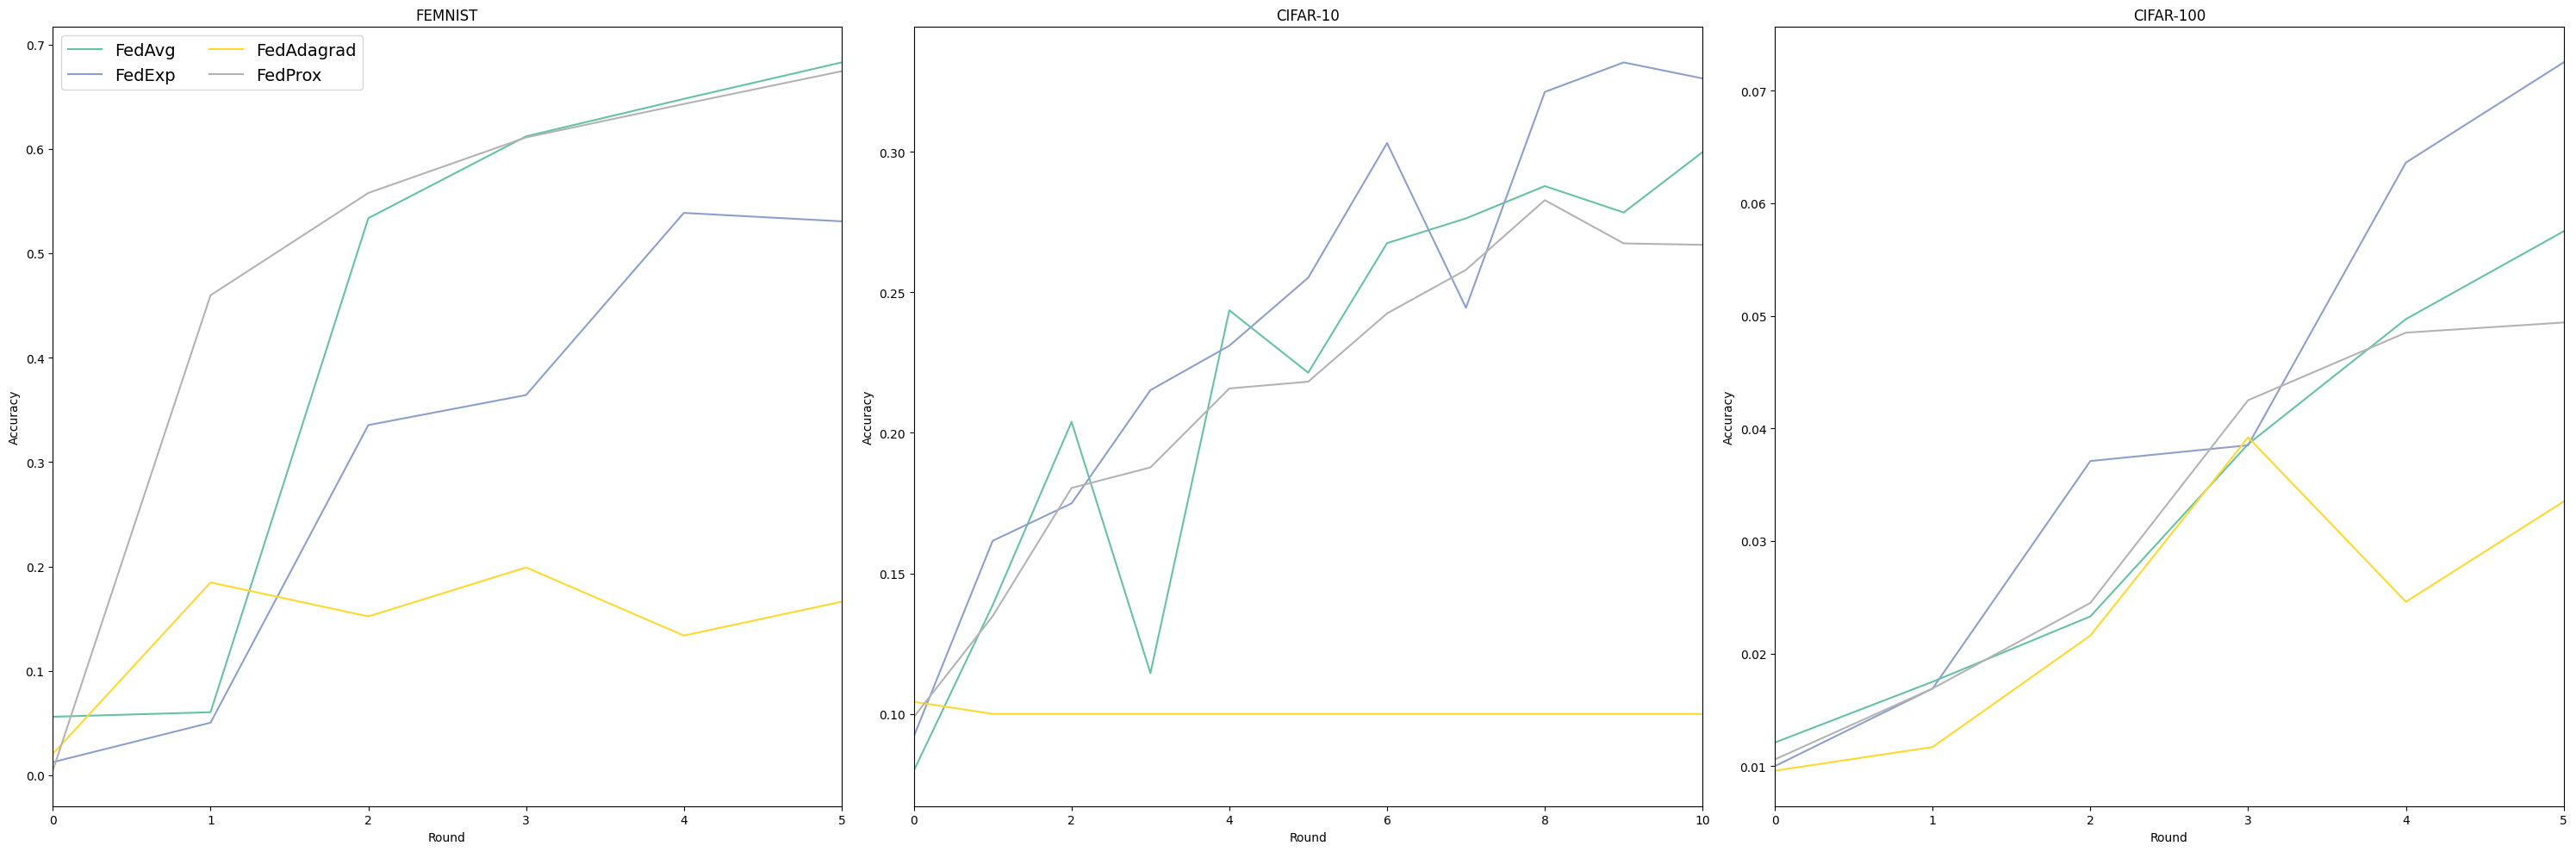

In [323]:
fig, ax = plt.subplots(figsize=(30,10), nrows=1, ncols=3)
cmap = plt.get_cmap('Set2', len(cifar100_algorithms))
for i, alg in enumerate(femnist_algorithms):
    ax[0].plot(np.arange(len(femnist_algorithm_accuracies[alg])), femnist_algorithm_accuracies[alg], c = cmap(i), label = alg)
for i, alg in enumerate(femnist_algorithms):
    ax[1].plot(np.arange(len(cifar10_algorithm_accuracies[alg])), cifar10_algorithm_accuracies[alg], c = cmap(i))
for i, alg in enumerate(femnist_algorithms):
    ax[2].plot(np.arange(len(cifar100_algorithm_accuracies[alg])), cifar100_algorithm_accuracies[alg], c = cmap(i))

ax[0].set_title("FEMNIST")
ax[1].set_title("CIFAR-10")
ax[2].set_title("CIFAR-100")

ax[0].set_ylabel("Accuracy")
ax[1].set_ylabel("Accuracy")
ax[2].set_ylabel("Accuracy")

ax[0].set_xlabel("Round")
ax[1].set_xlabel("Round")
ax[2].set_xlabel("Round")
ax[0].set_xbound(0,5)
ax[1].set_xbound(0,10)
ax[2].set_xbound(0,5)

fig.tight_layout()
ax[0].legend(loc='upper left', ncol=len(femnist_algorithms) // 2, fontsize=14)

fig.savefig("realDatasetPerformance.pdf")

## FEMNIST More Comparison of number of rounds of evaluation 

In [316]:
fedavg_femnist_path = Path("FedAvg_Femnist")
fedavg_femnist_accuracies = []
run_num = 1
cur_file_path = Path(f"hist_B=50_ηl=0.316_ηg=1_E=20_R=10_run_num={run_num}.npy")
while (fedavg_femnist_path / cur_file_path).exists():
    fedavg_femnist_accuracies.append([acc for (_, acc) in np.load(fedavg_femnist_path / cur_file_path, allow_pickle=True).item().metrics_centralized['accuracy']])
    run_num += 1
    cur_file_path = Path(f"hist_B=50_ηl=0.316_ηg=1_E=20_R=10_run_num={run_num}.npy")

fedavg_femnist_accuracies = np.array(fedavg_femnist_accuracies)
mean_fedavg_femnist_accuracy = np.mean(fedavg_femnist_accuracies, axis=0)
std_dev_fedavg_femnist_accuracy = np.std(fedavg_femnist_accuracies, axis=0, ddof=1)

In [317]:
fedexp_1RoundEvaluate_femnist_path = Path("FedExp_Femnist_1_round_validation")
fedexp_1RoundEvaluate_femnist_accuracies = []
run_num = 1
cur_file_path = Path(f"hist_B=50_E=20_R=10_ηl=0.316_ε=0.1_run_num={run_num}.npy")
while (fedexp_1RoundEvaluate_femnist_path / cur_file_path).exists():
    fedexp_1RoundEvaluate_femnist_accuracies.append([acc for (_, acc) in np.load(fedexp_1RoundEvaluate_femnist_path / cur_file_path, allow_pickle=True).item().metrics_centralized['accuracy']])
    run_num += 1
    cur_file_path = Path(f"hist_B=50_E=20_R=10_ηl=0.316_ε=0.1_run_num={run_num}.npy")

fedexp_1RoundEvaluate_femnist_accuracies = np.array(fedexp_1RoundEvaluate_femnist_accuracies)
mean_fedexp_1EvaluateRound_femnist_accuracy = np.mean(fedexp_1RoundEvaluate_femnist_accuracies, axis=0)
std_dev_fedexp_1EvaluateRound_femnist_accuracy = np.std(fedexp_1RoundEvaluate_femnist_accuracies, axis=0, ddof=1)

In [318]:
fedexp_2RoundEvaluate_femnist_path = Path("FedExp_Femnist_2_round_validation")
fedexp_2RoundEvaluate_femnist_accuracies = []
run_num = 1
cur_file_path = Path(f"hist_num_clients=3230_num_rounds=10_num_local_epochs=20_run_num={run_num}.npy")
while (fedexp_2RoundEvaluate_femnist_path / cur_file_path).exists():
    fedexp_2RoundEvaluate_femnist_accuracies.append([acc for (_, acc) in np.load(fedexp_2RoundEvaluate_femnist_path / cur_file_path, allow_pickle=True).item().metrics_centralized['accuracy']])
    run_num += 1
    cur_file_path = Path(f"hist_num_clients=3230_num_rounds=10_num_local_epochs=20_run_num={run_num}.npy")

fedexp_2RoundEvaluate_femnist_accuracies = np.array(fedexp_2RoundEvaluate_femnist_accuracies)
mean_fedexp_2EvaluateRound_femnist_accuracy = np.mean(fedexp_2RoundEvaluate_femnist_accuracies, axis=0)
std_dev_fedexp_2EvaluateRound_femnist_accuracy = np.std(fedexp_2RoundEvaluate_femnist_accuracies, axis=0, ddof=1)

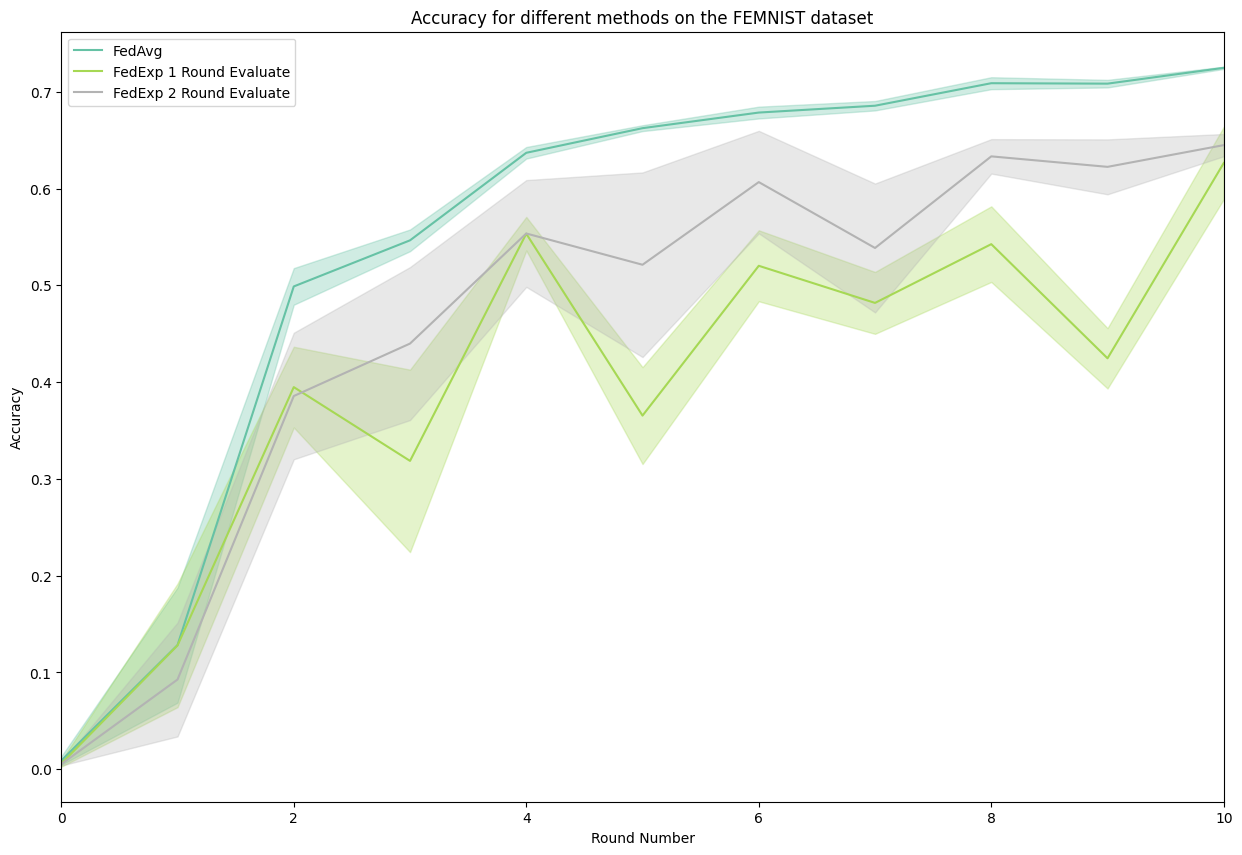

In [319]:
cmap = plt.get_cmap('Set2', 3)

fig, ax = plt.subplots(figsize=(15,10))

roundNumbers = np.arange(len(mean_fedexp_1EvaluateRound_femnist_accuracy))
ax.plot(roundNumbers, mean_fedavg_femnist_accuracy, label='FedAvg', c=cmap(0))
ax.fill_between(roundNumbers,
                mean_fedavg_femnist_accuracy - std_dev_fedavg_femnist_accuracy,
                mean_fedavg_femnist_accuracy + std_dev_fedavg_femnist_accuracy,
                color = cmap(0),
                alpha = .3)

ax.plot(roundNumbers, mean_fedexp_1EvaluateRound_femnist_accuracy, label='FedExp 1 Round Evaluate', c=cmap(1))
ax.fill_between(roundNumbers,
                mean_fedexp_1EvaluateRound_femnist_accuracy - std_dev_fedexp_1EvaluateRound_femnist_accuracy,
                mean_fedexp_1EvaluateRound_femnist_accuracy + std_dev_fedexp_1EvaluateRound_femnist_accuracy,
                color = cmap(1),
                alpha = .3)

ax.plot(roundNumbers, mean_fedexp_2EvaluateRound_femnist_accuracy, label='FedExp 2 Round Evaluate', c=cmap(2))
ax.fill_between(roundNumbers,
                mean_fedexp_2EvaluateRound_femnist_accuracy - std_dev_fedexp_2EvaluateRound_femnist_accuracy,
                mean_fedexp_2EvaluateRound_femnist_accuracy + std_dev_fedexp_2EvaluateRound_femnist_accuracy,
                color = cmap(2),
                alpha = .3)

ax.set_ylabel("Accuracy")
ax.set_xlabel("Round Number")
ax.set_xbound(0,roundNumbers[-1])
ax.set_title("Accuracy for different methods on the FEMNIST dataset")
ax.legend()
plt.show()
fig.tight_layout()
fig.savefig("femnist_fedexp_fedavg_evaluateRounds.pdf")